<a href="https://colab.research.google.com/github/Itsdevanand/Itsdevanand/blob/main/News_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data set is taken from kaggle

In [19]:
df = pd.read_csv("/content/BBC News Train.csv")
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [21]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

We can see that data is balanced.
Lets Clean the data

In [22]:
#Removing stopwords from data
stop = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [23]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses $168m payout eighteen former enro...,business


In [24]:
#Removing symbols from text
def cleaner(text):
  formated_text = re.sub('[^A-Za-z" "]+'," ", text).lower()
  formated_text = re.sub('[0-9" "]+', " ", formated_text)
  return formated_text

df['Text'] = df['Text'].apply(cleaner)

In [25]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses m payout eighteen former enron di...,business


In [31]:
#Lematization
df1 = df.copy()
lem = WordNetLemmatizer()

def lemm(text):
  words = word_tokenize(text)
  words1 = [lem.lemmatize(word) for word in words]  #lematization 
  text1 = ' '.join(words1)
  return text1

df['Text'] = df['Text'].apply(lemm)

In [38]:
#unigram word cloud 

text_sport = ' '.join(df[df['Category'] == 'sport']['Text'])
text_business = ' '.join(df[df['Category'] == 'business']['Text'])
text_politics = ' '.join(df[df['Category'] == 'politics']['Text'])
text_entertainment = ' '.join(df[df['Category'] == 'entertainment']['Text'])
text_tech = ' '.join(df[df['Category'] == 'tech']['Text'])


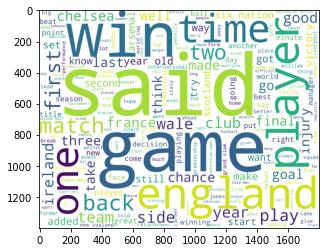

In [39]:
#World cloud on Sports news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_sport)

plt.imshow(wordcloud_ip)

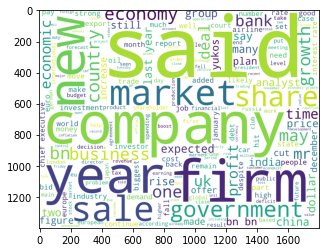

In [40]:
#World cloud on business news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_business)

plt.imshow(wordcloud_ip)

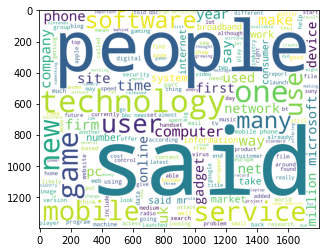

In [41]:
#World cloud on Tech news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_tech)

plt.imshow(wordcloud_ip)

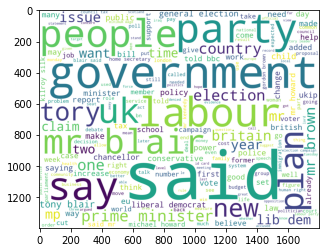

In [42]:
#World cloud on politics news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_politics)

plt.imshow(wordcloud_ip)

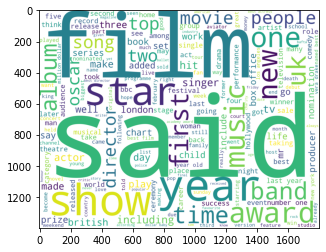

In [43]:
#World cloud on entertainment news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_entertainment)

plt.imshow(wordcloud_ip)

**Preparing Data For model building...**

In [46]:
#Label Encoding
from pandas.core.indexes import category
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['category'] = enc.fit_transform(df['Category'])


In [48]:
X = df['Text'] #input
Y = df['category'] #output
